In [1]:
import os
import pandas as pd
df=pd.read_csv('C:/Users/Ritwiz/OneDrive/Desktop/iris.csv')
df.drop('species', axis=1, inplace = True)
df.drop('petal_width', axis=1, inplace = True)
df.head()

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


In [2]:
data_arr=df.values[:,0:3]

import numpy as np
arr=np.asarray(data_arr)
#normalization
max1=arr.max(axis=0)
min1=arr.min(axis=0)
arr[:,0]=(arr[:,0]-min1[0])/(max1[0]-min1[0])
arr[:,1]=(arr[:,1]-min1[1])/(max1[1]-min1[1])
arr[:,2]=(arr[:,2]-min1[2])/(max1[2]-min1[2])
#arr normalized
arr.shape

(150, 3)

In [3]:
#create similarity matrix
s=(150,150)
S=np.zeros(s) #initialize matrix

m=data_arr.shape[0]
n=data_arr.shape[1]

import math
for x in range(m):
    for y in range(m):
        #euclidean distance
        S[x,y]=math.sqrt(pow(arr[x,0]-arr[y,0],2)+pow(arr[x,1]-arr[y,1],2)+pow(arr[x,2]-arr[y,2],2))
        
#similarity matrix created

#form 'm' clusters
#avg=S.mean(axis=1)
avg=np.average(S,axis=1)
clusters150=np.eye(150,150)
for x in range(m):
    for y in range(m):
        if S[x,y] <= avg[x]:
            clusters150[x,y]=1
#'m' clusters created

In [4]:
listoflist=[]
for i in range(m):
    templist=[]
    templist.append(i+1)
    for j in range(m):
        if clusters150[i,j]==1 and j!=i:
            templist.append(j+1)
    listoflist.append(templist)
    

def clustering(list1):

    listoflist=list1
    l2=listoflist[:]
    for i in listoflist:
        for j in listoflist:
            if set(i).issubset(set(j)) and i != j:
                l2.remove(i)
                break

    p=len(l2)
    C=np.zeros(shape=(p,p))
    for i in range(p):
        for j in range(p):
            #jaccard similarity
            C[i,j]=len(np.intersect1d(l2[i],l2[j]))/len(np.union1d(l2[i],l2[j]))
            if C[i,j]==1:
                C[i,j]=0

    k,l=np.where(C==C.max())
    
    for i in range(len(l2)):
        for j in range(len(l2)):
            for o in range(len(k)):
                if i==k[o] and j==l[o]:
                    l2[i]=list(set(l2[i])|set(l2[j]))
                    l2.remove(l2[j])
    
    
    return l2

In [5]:
l3=clustering(listoflist)
l4=clustering(l3)
l5=clustering(l4)
l6=clustering(l5)
l7=clustering(l6)
len(l7)

3

In [6]:
len(l7[0])+len(l7[1])+len(l7[2])

286

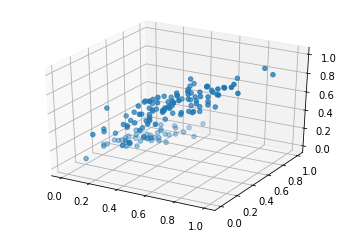

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_arr[:,0],data_arr[:,1],data_arr[:,2])

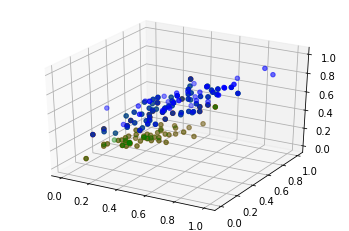

In [36]:
#arr_l7=np.array(l7)
new_data_arr=np.append(data_arr,np.zeros((150,1),dtype=int),axis=1)
for i in range(150):
    if i in l7[0]:
        new_data_arr[i,3]=1
    if i in l7[1]:
        new_data_arr[i,3]=2
    if i in l7[2]:
        new_data_arr[i,3]=3

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')

plotarr1=df.loc[df.index.isin(l7[0])]
plotarr2=df.loc[df.index.isin(l7[1])]
plotarr3=df.loc[df.index.isin(l7[2])]

plot1=np.array(plotarr1.values[:,0:3])
plot2=np.array(plotarr2.values[:,0:3])
plot3=np.array(plotarr3.values[:,0:3])

ax1.scatter(plot1[:,0],plot1[:,1],plot1[:,2], c='red')
ax1.scatter(plot2[:,0],plot2[:,1],plot2[:,2], c='green')
ax1.scatter(plot3[:,0],plot3[:,1],plot3[:,2], c='blue')

In [35]:
centroid1=np.median(plotarr1,axis=0)
centroid2=np.median(plotarr2,axis=0)
centroid3=np.median(plotarr3,axis=0)

belong=np.zeros(shape=(150,3))

for i in range(150):
    deno1=math.sqrt(pow(data_arr[i,0]-centroid1[0],2)+pow(data_arr[i,1]-centroid1[1],2)+pow(data_arr[i,2]-centroid1[2],2))
    deno2=math.sqrt(pow(data_arr[i,0]-centroid2[0],2)+pow(data_arr[i,1]-centroid2[1],2)+pow(data_arr[i,2]-centroid2[2],2))
    deno3=math.sqrt(pow(data_arr[i,0]-centroid3[0],2)+pow(data_arr[i,1]-centroid3[1],2)+pow(data_arr[i,2]-centroid3[2],2))
    deno=deno1+deno2+deno3
    belong[i,0]=1-(deno1/deno)
    belong[i,1]=1-(deno2/deno)
    belong[i,2]=1-(deno3/deno)

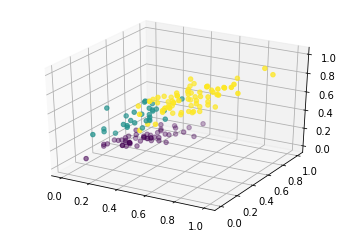

In [40]:
final_data=np.append(data_arr,np.zeros((150,1),dtype=int),axis=1)
for i in range(150):
    if belong[i,0] > belong[i,1] and belong[i,0] > belong[i,2]:
        final_data[i,3]=1
    if belong[i,1] > belong[i,0] and belong[i,1] > belong[i,2]:
        final_data[i,3]=2
    if belong[i,2] > belong[i,0] and belong[i,2] > belong[i,1]:
        final_data[i,3]=3
        
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
labels=final_data[:,3]
ax2.scatter(final_data[:,0],final_data[:,1],final_data[:,2], c=labels.astype(np.float))